In [2]:
'''пример оптимизации в которой максимизируется вертикальная часть цепи'''
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [3]:
R = 1
h = 1
phiMax = 2 * np.pi * 10


def generate_spiral(R, h, phiMax):
    dphi = 0.01  # шаг разбиения по углу
    elements = []

    for phi in np.arange(0, phiMax, dphi):
        el = [R * np.sin(phi) * dphi, R * np.cos(phi) * dphi, h * dphi / 2 / np.pi]
        elements.append(el)
    return np.array(elements)


elements = generate_spiral(R, h, phiMax)
length = np.linalg.norm(elements[0])
def norm(elements, length):
    elements /= np.expand_dims(np.linalg.norm(elements, axis=1), 1)/length
    return elements

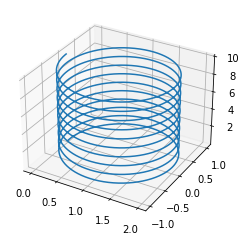

In [4]:
# %matplotlib notebook
fig = plt.figure()      #figsize=(10, 10)
ax  = fig.add_subplot(projection='3d')
coords = np.cumsum(elements, axis=0)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2])

In [5]:
def count_loss(elements):
    return np.sum(elements[:, 2])

In [316]:
elements = generate_spiral(R, h, phiMax)

# Обучение с помощью pytorch

In [52]:
import torch

In [53]:
# Определяем на чем у нас будут производиться вычисления (cuda/cpu)
device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda', index=0)

In [317]:
# weights = torch.from_numpy(elements).to(device)
weight = torch.tensor(elements, requires_grad=True)
weight

tensor([[ 0.0000e+00,  1.0000e-02,  1.5915e-03],
        [ 9.9998e-05,  9.9995e-03,  1.5915e-03],
        [ 1.9999e-04,  9.9980e-03,  1.5915e-03],
        ...,
        [-2.1851e-04,  9.9976e-03,  1.5915e-03],
        [-1.1853e-04,  9.9993e-03,  1.5915e-03],
        [-1.8531e-05,  1.0000e-02,  1.5915e-03]], dtype=torch.float64,
       requires_grad=True)

In [64]:
def count_loss(elements):
    return torch.sum(elements[:, 2])
count_loss(weight)

tensor(10.0013, dtype=torch.float64, grad_fn=<SumBackward0>)

In [38]:
# %%timeit
# loss = count_loss(weights[0])

In [50]:
elements = weight
elements/elements.pow(2).sum(axis=1, keepdims=True).pow(0.5)

tensor([[ 0.0000e+00,  1.8017e-03, -1.0000e+00],
        [ 1.8017e-05,  1.8016e-03, -1.0000e+00],
        [ 3.6031e-05,  1.8013e-03, -1.0000e+00],
        ...,
        [-3.9369e-05,  1.8013e-03, -1.0000e+00],
        [-2.1355e-05,  1.8016e-03, -1.0000e+00],
        [-3.3386e-06,  1.8017e-03, -1.0000e+00]], dtype=torch.float64,
       grad_fn=<DivBackward0>)

## с помощью Adam

In [328]:
criterion = count_loss
optimizer = torch.optim.Adam([weight], lr=1e-2, betas=(0.9, 0.99))

Наконец, мы переходим в **циклу обучения**!

Ранее мы итерировались по эпохам и батчам (batch) (это называется обучающим циклом). Итак, давайте повторим это здесь

In [329]:
epochs = 100
history = []

In [330]:
for i in range(epochs):

    # 3. вычислеяем - функцию потерь (loss)
    loss = criterion(weight)
    history.append(loss.item())

    # 4. вычисляем градиенты
    optimizer.zero_grad()
    loss.backward(retain_graph=True)

    # 5. шаг градиентного спуска
    optimizer.step()
    with torch.no_grad():
        weight /= (weight.pow(2).sum(axis=1, keepdims=True).pow(0.5)/length)
    # weights[0] = norm(weights[0], length)

    print(f'{i+1},\t loss: {history[-1]}')

1,	 loss: -57.778500162644335
2,	 loss: -62.1317876562607
3,	 loss: -63.25028220917244
4,	 loss: -63.53447925015688
5,	 loss: -63.60648828104968
6,	 loss: -63.62472078372865
7,	 loss: -63.62933637809582
8,	 loss: -63.63050477190481
9,	 loss: -63.63080053628112
10,	 loss: -63.630875405140266
11,	 loss: -63.630894357192645
12,	 loss: -63.630899154650834
13,	 loss: -63.630900369063056
14,	 loss: -63.63090067647517
15,	 loss: -63.630900754292455
16,	 loss: -63.630900773990895
17,	 loss: -63.63090077897727
18,	 loss: -63.6309007802395
19,	 loss: -63.63090078055899
20,	 loss: -63.630900780639905
21,	 loss: -63.63090078066037
22,	 loss: -63.630900780665556
23,	 loss: -63.63090078066687
24,	 loss: -63.63090078066719
25,	 loss: -63.63090078066728
26,	 loss: -63.6309007806673
27,	 loss: -63.6309007806673
28,	 loss: -63.6309007806673
29,	 loss: -63.6309007806673
30,	 loss: -63.6309007806673
31,	 loss: -63.6309007806673
32,	 loss: -63.6309007806673
33,	 loss: -63.6309007806673
34,	 loss: -63.63090

In [331]:
# %%timeit
# loss = criterion(weights[0])
# history.append(loss.item())
#
# # 4. вычисляем градиенты
# optimizer.zero_grad()
# loss.backward()
#
# # 5. шаг градиентного спуска
# optimizer.step()


построим график изменения точности просто для проверки правильности.

In [332]:
import matplotlib.pyplot as plt

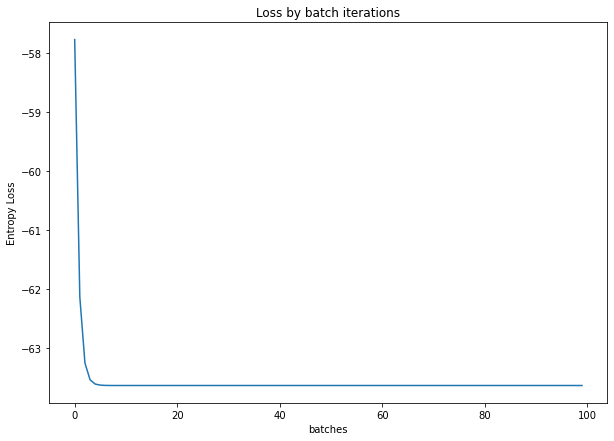

In [333]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

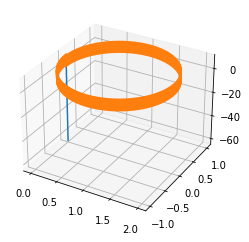

In [70]:
# %matplotlib notebook
result = weight.detach().numpy()
fig = plt.figure()      #figsize=(10, 10)
ax  = fig.add_subplot(projection='3d')
coords = np.cumsum(result, axis=0)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2])
coords = np.cumsum(elements, axis=0)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2])

# Оптимизация ручным градиентынм спуском

In [40]:
criterion = count_loss


Наконец, мы переходим в **циклу обучения**!

Ранее мы итерировались по эпохам и батчам (batch) (это называется обучающим циклом). Итак, давайте повторим это здесь

In [334]:
epochs = 10
lr = 1
history = []

In [335]:
for i in range(epochs):

    # 3. вычислеяем - функцию потерь (loss)
    loss = criterion(weight)
    history.append(loss.item())

    # 4. вычисляем градиенты
    optimizer.zero_grad()
    loss.backward(retain_graph=True)

    # 5. шаг градиентного спуска

    with torch.no_grad():
        weight -= lr*torch.sum(weight.grad*weight, 1, keepdim=True)*weight
    # weights[0] = norm(weights[0], length)

    print(f'{i+1},\t loss: {history[-1]}')

1,	 loss: -63.6309007806673
2,	 loss: -64.27521833861755
3,	 loss: -64.93265049846427
4,	 loss: -65.6036003871905
5,	 loss: -66.28848778116921
6,	 loss: -66.9877499728169
7,	 loss: -67.70184269185269
8,	 loss: -68.43124108521239
9,	 loss: -69.17644076001545
10,	 loss: -69.93795889436043


построим график изменения точности просто для проверки правильности.

In [313]:
import matplotlib.pyplot as plt

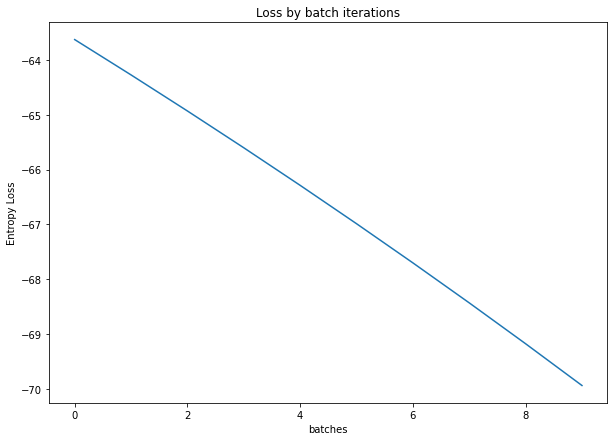

In [336]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

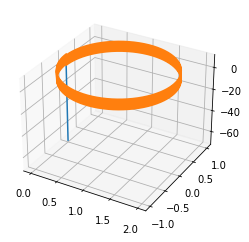

In [337]:
# %matplotlib notebook
result = weight.detach().numpy()
fig = plt.figure()      #figsize=(10, 10)
ax  = fig.add_subplot(projection='3d')
coords = np.cumsum(result, axis=0)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2])
coords = np.cumsum(elements, axis=0)
ax.plot(coords[:, 0], coords[:, 1], coords[:, 2])

## Вывод
С адамом получилось гораздо лучше, чем с ручным обновлением весов.